# J022 Rishi Gandhi 
# NLP Lab 1      21/07/24
# Tokens, text cleaning and frequency based vectorisation methods for text classification

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

In [9]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [10]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

# Get top 10 words for each class
spam_corpus = df[df['label'] == 'spam']['text']
ham_corpus = df[df['label'] == 'ham']['text']

spam_vec = CountVectorizer(stop_words=stop_words)
ham_vec = CountVectorizer(stop_words=stop_words)

spam_bow = spam_vec.fit_transform(spam_corpus)
ham_bow = ham_vec.fit_transform(ham_corpus)

spam_sum_words = spam_bow.sum(axis=0)
ham_sum_words = ham_bow.sum(axis=0)

spam_words_freq = [(word, spam_sum_words[0, idx]) for word, idx in spam_vec.vocabulary_.items()]
ham_words_freq = [(word, ham_sum_words[0, idx]) for word, idx in ham_vec.vocabulary_.items()]

spam_words_freq = sorted(spam_words_freq, key=lambda x: x[1], reverse=True)[:10]
ham_words_freq = sorted(ham_words_freq, key=lambda x: x[1], reverse=True)[:10]

spam_words = [word for word, freq in spam_words_freq]
ham_words = [word for word, freq in ham_words_freq]

print("Top 10 words in spam messages:", spam_words)
print("Top 10 words in ham messages:", ham_words)

Top 10 words in spam messages: ['call', 'free', 'txt', 'ur', 'mobile', 'text', 'stop', 'claim', 'reply', 'www']
Top 10 words in ham messages: ['gt', 'lt', 'get', 'ok', 'go', 'ur', 'know', 'call', 'good', 'got']


In [19]:
# Get top 10 bigrams for each class
spam_bigram_vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
ham_bigram_vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)

spam_bigrams_bow = spam_bigram_vec.fit_transform(spam_corpus)
ham_bigrams_bow = ham_bigram_vec.fit_transform(ham_corpus)

spam_sum_bigrams = spam_bigrams_bow.sum(axis=0)
ham_sum_bigrams = ham_bigrams_bow.sum(axis=0)

spam_bigrams_freq = [(word, spam_sum_bigrams[0, idx]) for word, idx in spam_bigram_vec.vocabulary_.items()]
ham_bigrams_freq = [(word, ham_sum_bigrams[0, idx]) for word, idx in ham_bigram_vec.vocabulary_.items()]

spam_bigrams_freq = sorted(spam_bigrams_freq, key=lambda x: x[1], reverse=True)[:10]
ham_bigrams_freq = sorted(ham_bigrams_freq, key=lambda x: x[1], reverse=True)[:10]

spam_bigrams = [bigram for bigram, freq in spam_bigrams_freq]
ham_bigrams = [bigram for bigram, freq in ham_bigrams_freq]

print("Top 10 bigrams in spam messages:", spam_bigrams)
print("Top 10 bigrams in ham messages:", ham_bigrams)

Top 10 bigrams in spam messages: ['co uk', 'please call', 'po box', '1000 cash', 'guaranteed call', 'prize guaranteed', 'national rate', 'selected receive', 'send stop', 'every week']
Top 10 bigrams in ham messages: ['lt gt', 'call later', 'let know', 'sorry call', 'take care', 'good morning', 'lt decimal', 'decimal gt', 'new year', 'pls send']


In [20]:
# Get top 10 trigrams for each class
spam_trigram_vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)
ham_trigram_vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)

spam_trigrams_bow = spam_trigram_vec.fit_transform(spam_corpus)
ham_trigrams_bow = ham_trigram_vec.fit_transform(ham_corpus)

spam_sum_trigrams = spam_trigrams_bow.sum(axis=0)
ham_sum_trigrams = ham_trigrams_bow.sum(axis=0)

spam_trigrams_freq = [(word, spam_sum_trigrams[0, idx]) for word, idx in spam_trigram_vec.vocabulary_.items()]
ham_trigrams_freq = [(word, ham_sum_trigrams[0, idx]) for word, idx in ham_trigram_vec.vocabulary_.items()]

spam_trigrams_freq = sorted(spam_trigrams_freq, key=lambda x: x[1], reverse=True)[:10]
ham_trigrams_freq = sorted(ham_trigrams_freq, key=lambda x: x[1], reverse=True)[:10]

spam_trigrams = [trigram for trigram, freq in spam_trigrams_freq]
ham_trigrams = [trigram for trigram, freq in ham_trigrams_freq]

print("Top 10 trigrams in spam messages:", spam_trigrams)
print("Top 10 trigrams in ham messages:", ham_trigrams)

Top 10 trigrams in spam messages: ['prize guaranteed call', 'suite342 2lands row', 'reply call 08000930705', 'land line claim', 'private 2003 account', '2003 account statement', 'guaranteed 1000 cash', 'camcorder reply call', 'shows 800 un', '800 un redeemed']
Top 10 trigrams in ham messages: ['sorry call later', 'lt decimal gt', 'happy new year', 'like lt gt', 'pls send message', 'gt lt gt', 'cant pick phone', 'pick phone right', 'phone right pls', 'right pls send']


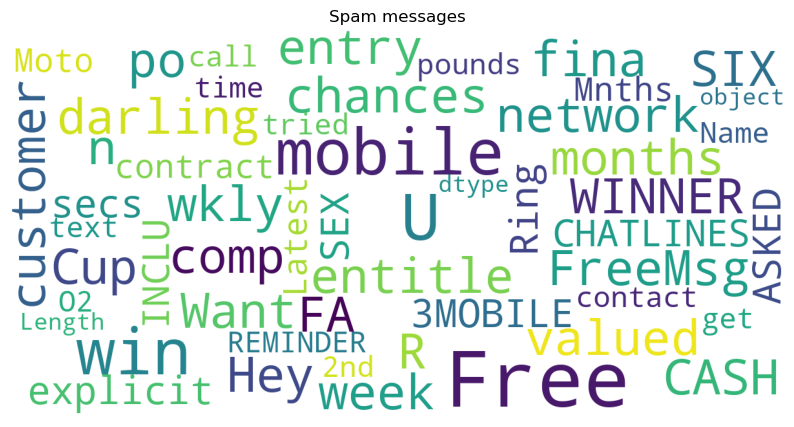

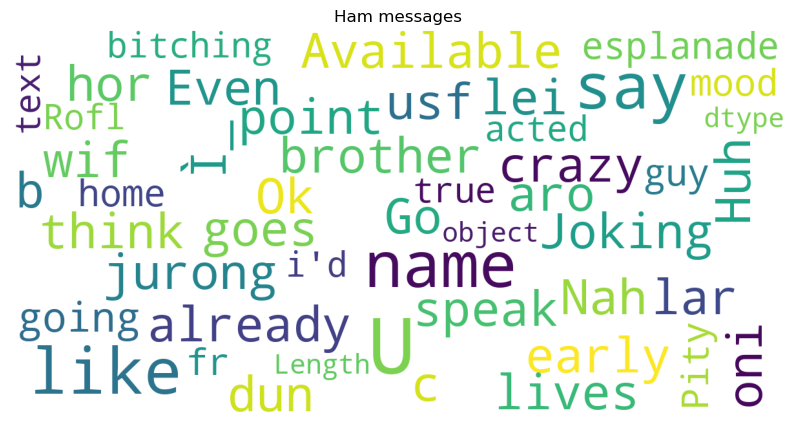

In [21]:
# Create wordcloud for each class
def plot_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(text))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['label'] == 'spam']['text'], 'Spam messages')
plot_wordcloud(df[df['label'] == 'ham']['text'], 'Ham messages')

In [22]:
# Convert Text to Vectors Using Bag-of-Words Model
vectorizer = CountVectorizer(stop_words=stop_words)
X_bow = vectorizer.fit_transform(df['text'])
y = df['label'].map({'ham': 0, 'spam': 1})

In [23]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Apply Machine Learning Model and Record the F1-Score
model = MultinomialNB()
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)

f1_bow = f1_score(y_test, y_pred_bow)
print("F1-score with Bag-of-Words:", f1_bow)
print(classification_report(y_test, y_pred_bow))

F1-score with Bag-of-Words: 0.9072847682119205
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.91      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.97      1115



In [24]:
# Repeat Step 3 and 4 with Tf-IDF Vectors
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1-score with Tf-IDF:", f1_tfidf)
print(classification_report(y_test, y_pred_tfidf))

F1-score with Tf-IDF: 0.888888888888889
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [26]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...


True

In [27]:
# Add Text Preprocessing Steps and Repeat Step 4 with Tf-IDF Vectors
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df['text_processed'] = df['text'].apply(preprocess_text)

In [28]:
df

,label,text,text_processed
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u å£ pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [29]:
# Convert text to vectors using Tf-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['text_processed'])

X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train, y_test = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)


In [30]:
model = MultinomialNB()
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)

f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1-score with Tf-IDF and Preprocessing:", f1_tfidf_preprocessed)
print(classification_report(y_test, y_pred_tfidf_preprocessed))

F1-score with Tf-IDF and Preprocessing: 0.8505747126436781
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [31]:
# List Out the Scores of Each Model
print("F1-score with Bag-of-Words:", f1_bow)
print("F1-score with Tf-IDF:", f1_tfidf)
print("F1-score with Tf-IDF and Preprocessing:", f1_tfidf_preprocessed)

F1-score with Bag-of-Words: 0.9072847682119205
F1-score with Tf-IDF: 0.888888888888889
F1-score with Tf-IDF and Preprocessing: 0.8505747126436781
